In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as pth
import scipy.stats as scp
import statsmodels.api as sm

In [79]:
#Load data
BASE_DIR = pth.Path().resolve().parent #Path of the folder where this notebook is located
data_path = BASE_DIR / "data" / "Data.csv" #Complete path of the data
df = pd.read_csv(data_path) #Read csv
df_q = df.copy() #Create a copy for the quarterly aggregation
df_q["Date"] = pd.to_datetime(df_q["Date"]).dt.tz_localize(None) #Change the date column data type
df_q = df_q.set_index("Date") #Set the date column as the index of the dataset
df_q = df_q.sort_index() #Sort the dataframe

In [80]:
#Functions
def clean_na(data): #This function will drop all Nas keeping just the dates where all assets have information.
    data["Date"] = pd.to_datetime(data["Date"]).dt.tz_localize(None)
    data = data.set_index("Date")
    data = data.sort_index()
    Num_Na = data.isna().sum() #Count the number of empty values in each dataset
    print(Num_Na)
    data = data.dropna() #We delete all the observations where there is at least one missing value.
    return data

def log_returns(data):
    lret = np.log(data).diff()
    return lret

def statistics(data):
    mean = np.mean(data, axis = 0) #Mean
    variance = np.var(data, axis = 0) #Variance
    skewness = data.skew(axis = 0) #Skewness
    kurtosis = data.kurtosis(axis = 0) #Kurtosis
    statistical_info = pd.DataFrame({"Mean": mean, "Variance" : variance, "Skewness": skewness, "Kurtosis" : kurtosis}) #Data frame where all the results are presented
    return statistical_info


    

In [81]:
#Clean the data
df = clean_na(df) #Clean the data
df = df[df["Oil"] > 0] #There were observations where oil was negative due to storage
#Take differences and returns
df["LogRetSP500"] = log_returns(df["^GSPC"])
df["LogRetOil"] = log_returns(df["Oil"])
df["LogRetJPY"] = log_returns(df["USDJPY"])
df["CorSpDif"] = df["Corp_Spread"].diff() #For Corporate spread and government bonds we do not use the log returns
df["GovDif"] = df["DGS10"].diff()

^GSPC          326
DGS10          361
Corp_Spread     82
Oil            344
USDJPY         345
dtype: int64


In [82]:
stats = statistics(df)
print(stats)

                    Mean      Variance  Skewness   Kurtosis
^GSPC        2210.227668  1.878600e+06  1.254153   0.578377
DGS10           3.311517  1.688467e+00  0.071055  -0.736761
Corp_Spread     1.548553  7.042840e-01  3.288643  13.641978
Oil            63.893956  6.317181e+02  0.216837  -0.661436
USDJPY        111.821295  3.093868e+02  0.361999   0.327415
LogRetSP500     0.000240  1.516330e-04 -0.394050  10.511471
LogRetOil       0.000145  8.309426e-04 -1.995706  81.979450
LogRetJPY       0.000056  3.939263e-05 -0.377071   4.245658
CorSpDif       -0.000056  7.004048e-04  3.669441  74.544253
GovDif         -0.000355  3.424482e-03 -0.012548   2.353979


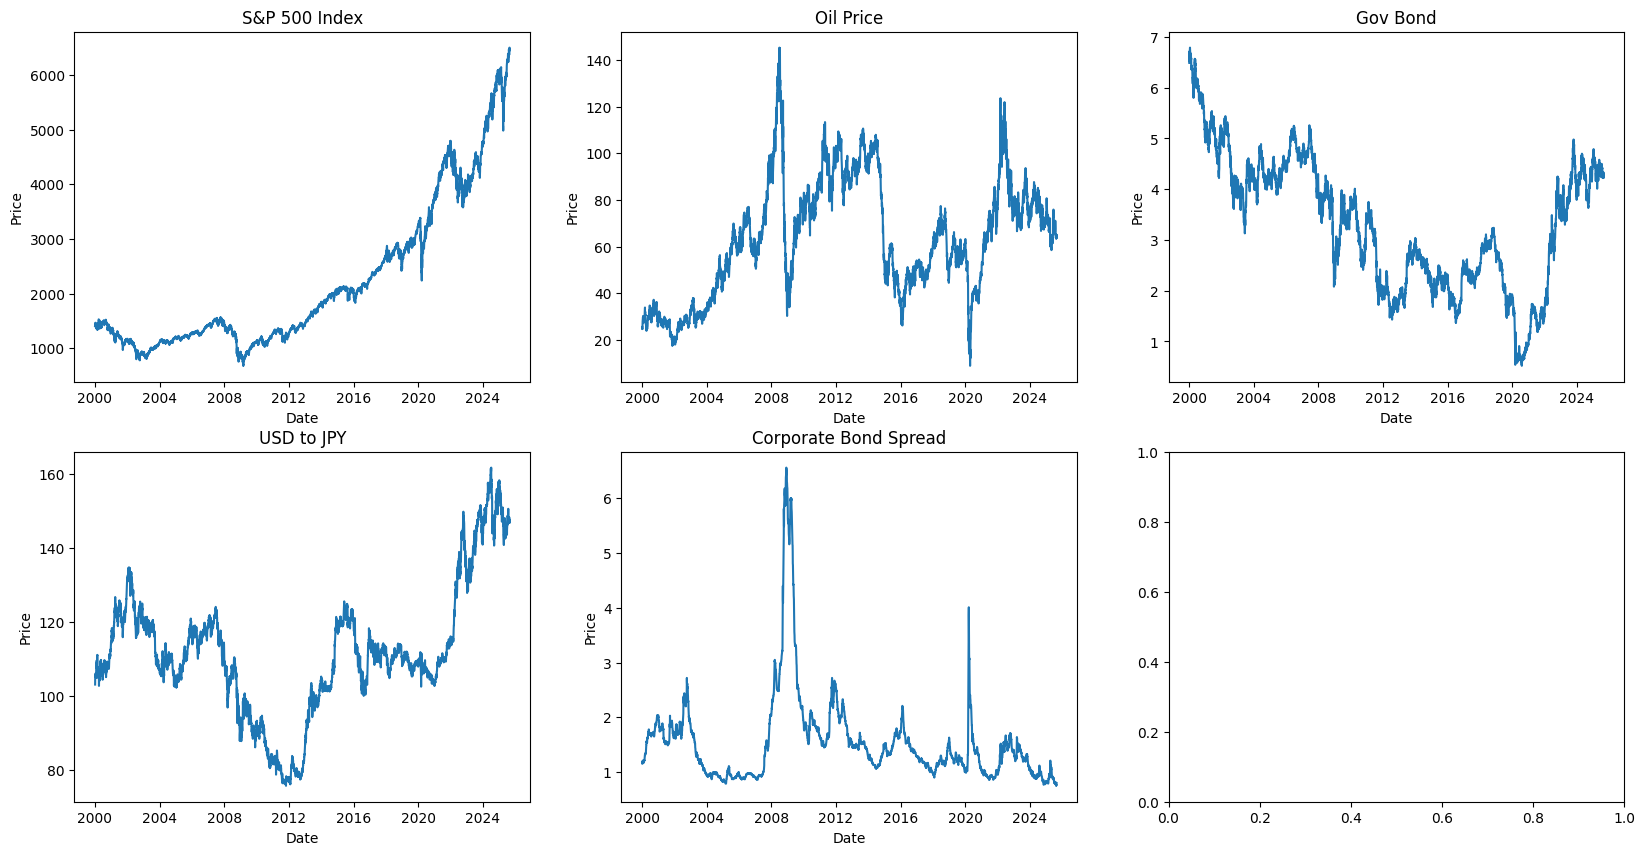

In [83]:
#PLOT PRICES
fig, ax = plt.subplots(2,3, figsize = (20,10))
#PLOT S&P 500
ax[0][0].set_title("S&P 500 Index")
ax[0][0].set_xlabel("Date")
ax[0][0].set_ylabel("Price")
ax[0][0].plot(df["^GSPC"])

#PLOT OIL
ax[0][1].set_title("Oil Price")
ax[0][1].set_xlabel("Date")
ax[0][1].set_ylabel("Price")
ax[0][1].plot(df["Oil"])

#PLOT GOV BOND
ax[0][2].set_title("Gov Bond")
ax[0][2].set_xlabel("Date")
ax[0][2].set_ylabel("Price")
ax[0][2].plot(df["DGS10"])

#PLOT USD JPY
ax[1][0].set_title("USD to JPY")
ax[1][0].set_xlabel("Date")
ax[1][0].set_ylabel("Price")
ax[1][0].plot(df["USDJPY"])

#PLOT CORPORATE BOND
ax[1][1].set_title("Corporate Bond Spread")
ax[1][1].set_xlabel("Date")
ax[1][1].set_ylabel("Price")
ax[1][1].plot(df["Corp_Spread"])


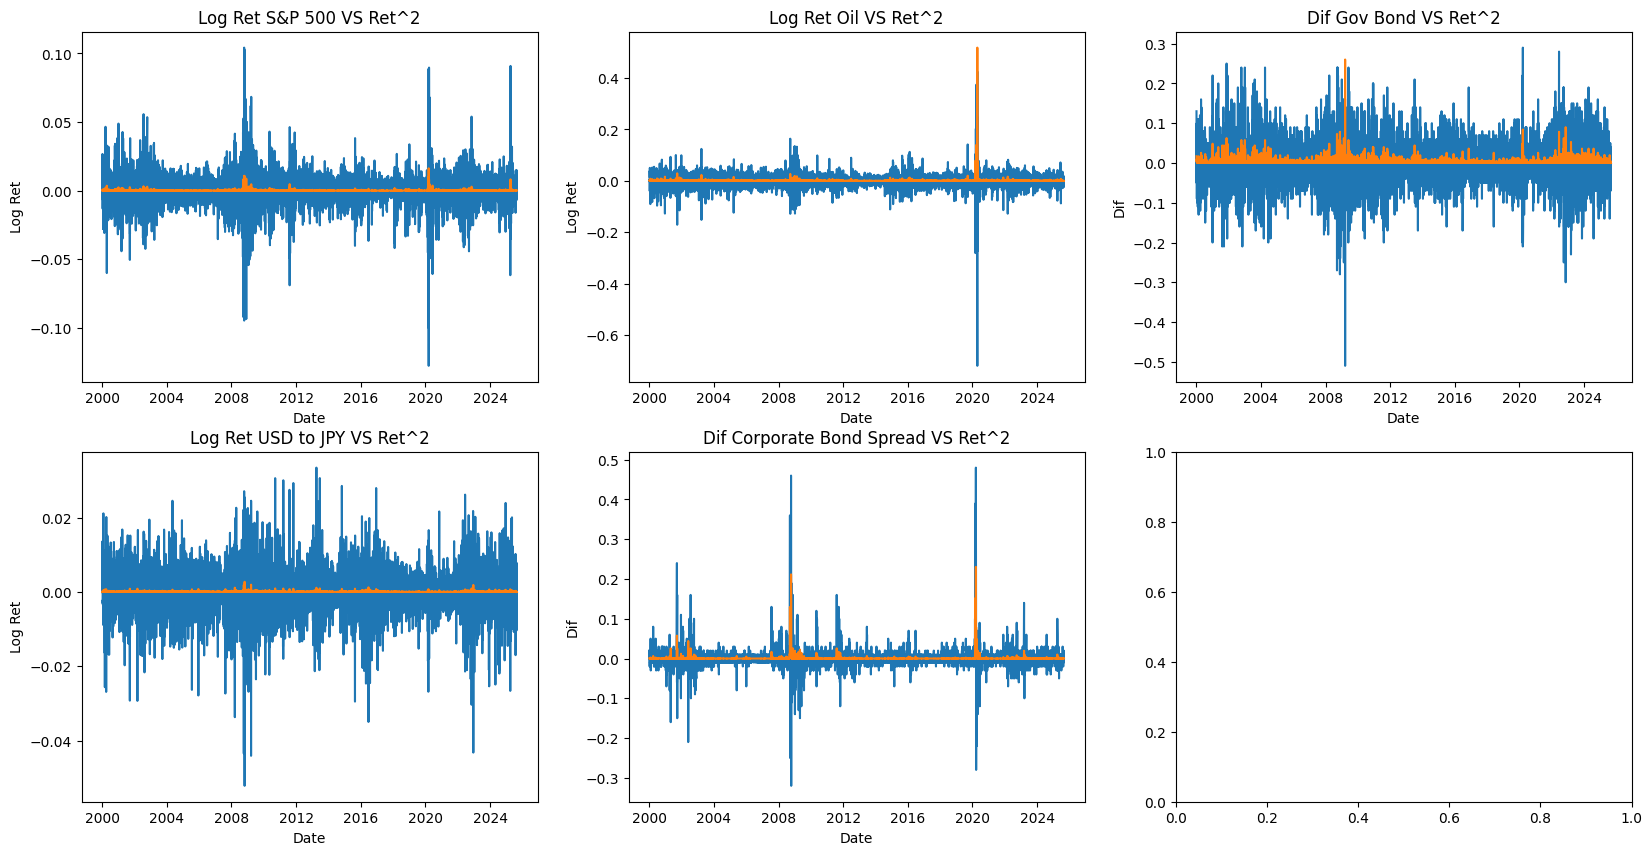

In [84]:
#PLOT LOG RETURNS AND DIFFERENCES AND SQUARED RETURNS
fig, ax = plt.subplots(2,3, figsize = (20,10))
#PLOT Log Ret S&P 500
ax[0][0].set_title("Log Ret S&P 500 VS Ret^2")
ax[0][0].set_xlabel("Date")
ax[0][0].set_ylabel("Log Ret")
ax[0][0].plot(df["LogRetSP500"])
ax[0][0].plot(df["LogRetSP500"] ** 2)

#PLOT Log Ret Oil
ax[0][1].set_title("Log Ret Oil VS Ret^2")
ax[0][1].set_xlabel("Date")
ax[0][1].set_ylabel("Log Ret")
ax[0][1].plot(df["LogRetOil"])
ax[0][1].plot(df["LogRetOil"] ** 2)

#PLOT Dif Gov Bond
ax[0][2].set_title("Dif Gov Bond VS Ret^2")
ax[0][2].set_xlabel("Date")
ax[0][2].set_ylabel("Dif")
ax[0][2].plot(df["GovDif"])
ax[0][2].plot(df["GovDif"]**2)

#PLOT Log Ret USD to JPY
ax[1][0].set_title("Log Ret USD to JPY VS Ret^2")
ax[1][0].set_xlabel("Date")
ax[1][0].set_ylabel("Log Ret")
ax[1][0].plot(df["LogRetJPY"])
ax[1][0].plot(df["LogRetJPY"] ** 2)

#PLOT Dif Corporate Bond Spread
ax[1][1].set_title("Dif Corporate Bond Spread VS Ret^2")
ax[1][1].set_xlabel("Date")
ax[1][1].set_ylabel("Dif")
ax[1][1].plot(df["CorSpDif"])
ax[1][1].plot(df["CorSpDif"]** 2)

<Axes: >

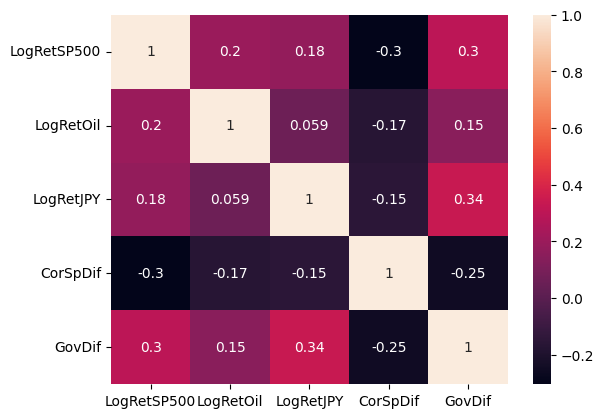

In [85]:
cols = df.columns
cols = cols[5:]
corr = df[cols].corr()
sns.heatmap(corr, annot = True)

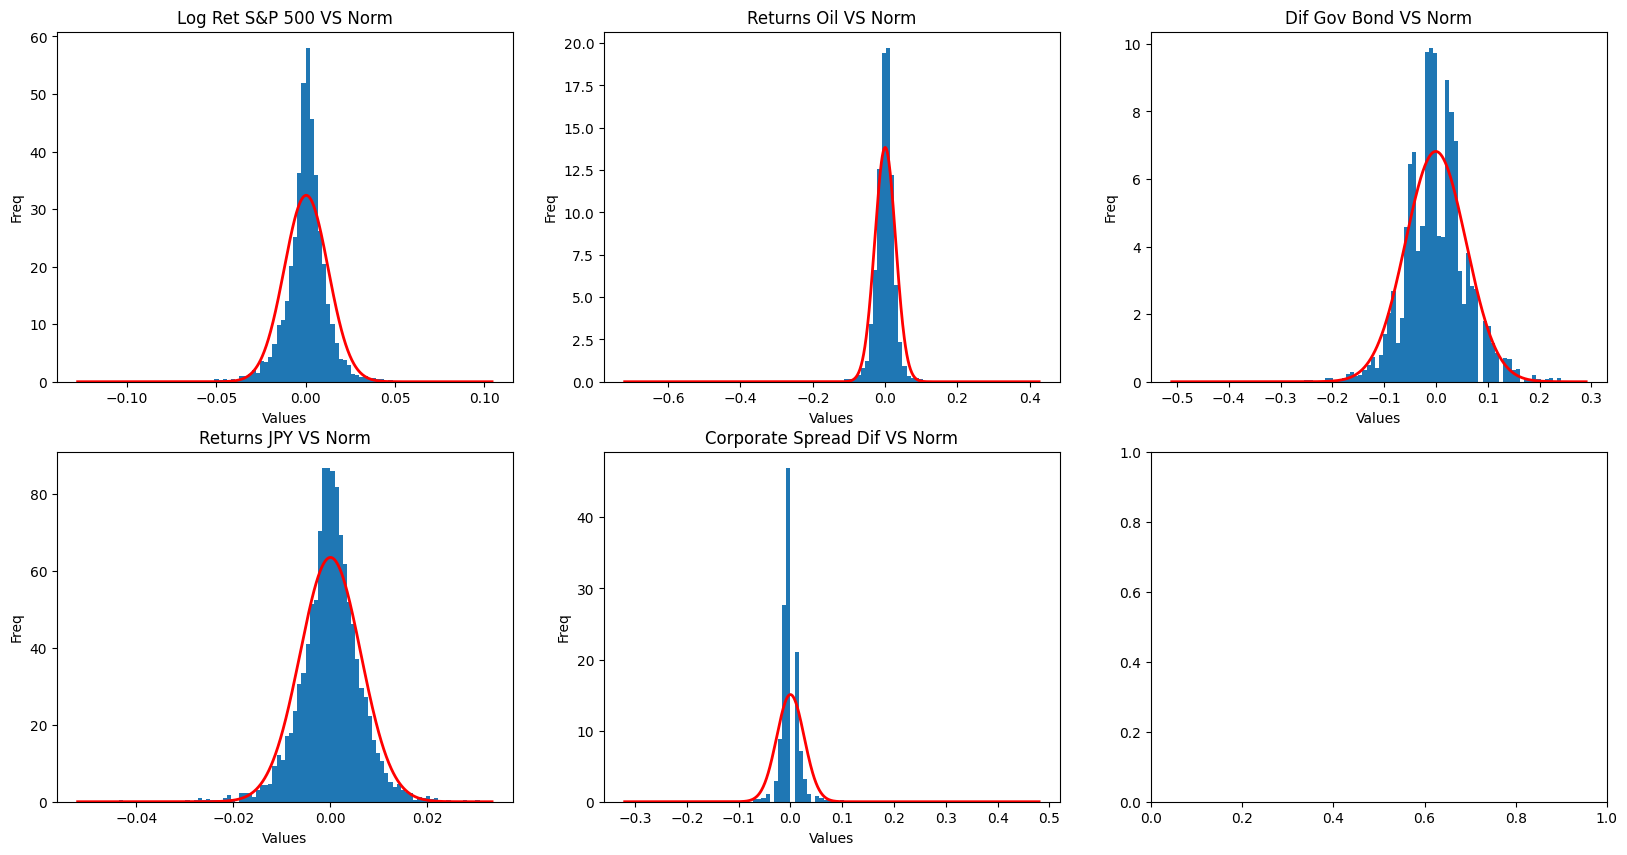

In [86]:
#PLOT RETURNS DISTRIBUTION VS NORMAL
fig, ax = plt.subplots(2,3, figsize = (20,10))
#PLOT S&P 500
x = df["LogRetSP500"].copy()
ax[0][0].set_title("Log Ret S&P 500 VS Norm")
ax[0][0].set_xlabel("Values")
ax[0][0].set_ylabel("Freq")
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 1000)
pdf = scp.norm.pdf(x_values, stats["Mean"]["LogRetSP500"],np.sqrt(stats["Variance"]["LogRetSP500"]))
ax[0][0].hist(x, bins = 100, density = True)
ax[0][0].plot(x_values, pdf, 'r', lw = 2)

#PLOT Log Ret Oil
x = df["LogRetOil"].copy()
ax[0][1].set_title("Returns Oil VS Norm")
ax[0][1].set_xlabel("Values")
ax[0][1].set_ylabel("Freq")
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 1000)
pdf = scp.norm.pdf(x_values, stats["Mean"]["LogRetOil"], np.sqrt(stats["Variance"]["LogRetOil"]))
ax[0][1].hist(x, bins = 100, density = True)
ax[0][1].plot(x_values, pdf, 'r', lw = 2)

# #PLOT Dif Gov Bond
x = df["GovDif"].copy()
ax[0][2].set_title("Dif Gov Bond VS Norm")
ax[0][2].set_xlabel("Values")
ax[0][2].set_ylabel("Freq")
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 1000)
pdf = scp.norm.pdf(x_values, stats["Mean"]["GovDif"], np.sqrt(stats["Variance"]["GovDif"]))
ax[0][2].hist(x, bins = 100, density = True)
ax[0][2].plot(x_values, pdf, 'r', lw = 2)

# #PLOT Log Ret USD to JPY
x = df["LogRetJPY"].copy()
ax[1][0].set_title("Returns JPY VS Norm")
ax[1][0].set_xlabel("Values")
ax[1][0].set_ylabel("Freq")
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 1000)
pdf = scp.norm.pdf(x_values,  stats["Mean"]["LogRetJPY"], np.sqrt(stats["Variance"]["LogRetJPY"]))
ax[1][0].hist(x, bins = 100, density = True)
ax[1][0].plot(x_values, pdf, 'r', lw = 2)

# #PLOT Dif Corporate Bond Spread
x = df["CorSpDif"].copy()
ax[1][1].set_title("Corporate Spread Dif VS Norm")
ax[1][1].set_xlabel("Values")
ax[1][1].set_ylabel("Freq")
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 1000)
pdf = scp.norm.pdf(x_values, stats["Mean"]["CorSpDif"], np.sqrt(stats["Variance"]["CorSpDif"]))
ax[1][1].hist(x, bins = 100, density = True)
ax[1][1].plot(x_values, pdf, 'r', lw = 2)

plt.show()


In [87]:
#Aggregate quarterly data
df_q = df_q.resample("QE").last()
df_q = df_q.dropna()
df_q["LogRetSP500"] = log_returns(df_q["^GSPC"])
df_q["LogRetOil"] = log_returns(df_q["Oil"])
df_q["LogRetJPY"] = log_returns(df_q["USDJPY"])
df_q["CorSpDif"] = df_q["Corp_Spread"].diff() #For Corporate spread and government bonds we do not use the log returns
df_q["GovDif"] = df_q["DGS10"].diff()
df_q = df_q.dropna()

## AUGMENTED DICKEY FULLER 
H_0 The series contains a unit root test, this means that the first difference is stationary<br>
H_1 Reject the fact that the series contains a unit root, it is stationary<br>

In [88]:
from statsmodels.tsa.stattools import adfuller

In [89]:
ADF_results = pd.DataFrame()
for i in df_q:
    if i == "Oil" or  i == "^GSPC":
        results = adfuller(df_q[i], regression = "ct")
    else:
        results = adfuller(df_q[i],regression =  "c")
    ADF_results[i] = results

ADF_results = ADF_results[:][:2]
ADF_results

,^GSPC,DGS10,Corp_Spread,Oil,USDJPY,LogRetSP500,LogRetOil,LogRetJPY,CorSpDif,GovDif
0,1.905112,-2.584311,-3.473346,-2.955133,-1.121667,-9.525561,-11.852667,-5.061617,-8.996272,-8.717238
1,1.0,0.096283,0.008699,0.14506,0.706355,0.0,0.0,0.000017,0.0,0.0


# TESTING FOR COINTEGRATION
To test for cointegration, we run a regerssion where the US market is the independent variable. The theory states that cointegration between series exists if and only if there is a linear combination between order one integrated series and the residuals are stationary

In [94]:
y = df_q["^GSPC"].copy()
x = df_q[["DGS10","Oil","USDJPY"]].copy()
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     85.59
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           2.85e-27
Time:                        10:43:05   Log-Likelihood:                -819.56
No. Observations:                 102   AIC:                             1647.
Df Residuals:                      98   BIC:                             1658.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5091.5029    562.911     -9.045      0.0

In [95]:
adf_res = adfuller(model.resid, regression="n")

print("ADF:", adf_res[0])
print("p-value:", adf_res[1])

ADF: -3.1602415847649183
p-value: 0.0015745022466089362
